In [ ]:
# prompt: python code to count the number of files in a folder

import os

def count_files_in_folder(folder_path):
  """Counts the number of files in a given folder.

  Args:
    folder_path: The path to the folder.

  Returns:
    The number of files in the folder.
  """
  count = 0
  for _, _, files in os.walk(folder_path):
    count += len(files)
  return count

# Example usage:
folder_path = '/content/drive/MyDrive/Datasets/dataset/1-1004'  # Replace with the actual folder path
num_files = count_files_in_folder(folder_path)
print(f"The number of files in the folder is: {num_files}")


The number of files in the folder is: 1004


In [ ]:
# prompt: delete all files from the folder

import os

def delete_all_files_in_folder(folder_path):
    """Deletes all files in a given folder.

    Args:
        folder_path: The path to the folder.
    """
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Error deleting {file_path}: {e}")


# Example usage:
folder_path = '/content/drive/MyDrive/Datasets/dataset/3320-3954'  # Replace with the actual folder path
delete_all_files_in_folder(folder_path)


In [ ]:
# prompt: I'll provide. you a directory's path you need to traverse through all the files in all the folders present in that directory

import os

def traverse_directory(directory_path):
  """Traverses through all files in a directory and its subdirectories.

  Args:
    directory_path: The path to the directory.
  """
  for root, _, files in os.walk(directory_path):
    for file in files:
      file_path = os.path.join(root, file)
      print(file_path)

# Example usage:
directory_path = '/content/drive/MyDrive/Datasets/dataset/'  # Replace with the actual directory path
traverse_directory(directory_path)


3950


Total number of files: 3950
Number of files with at least one valid label: 3950
Number of files with NO valid labels: 0

Files with NO valid labels:


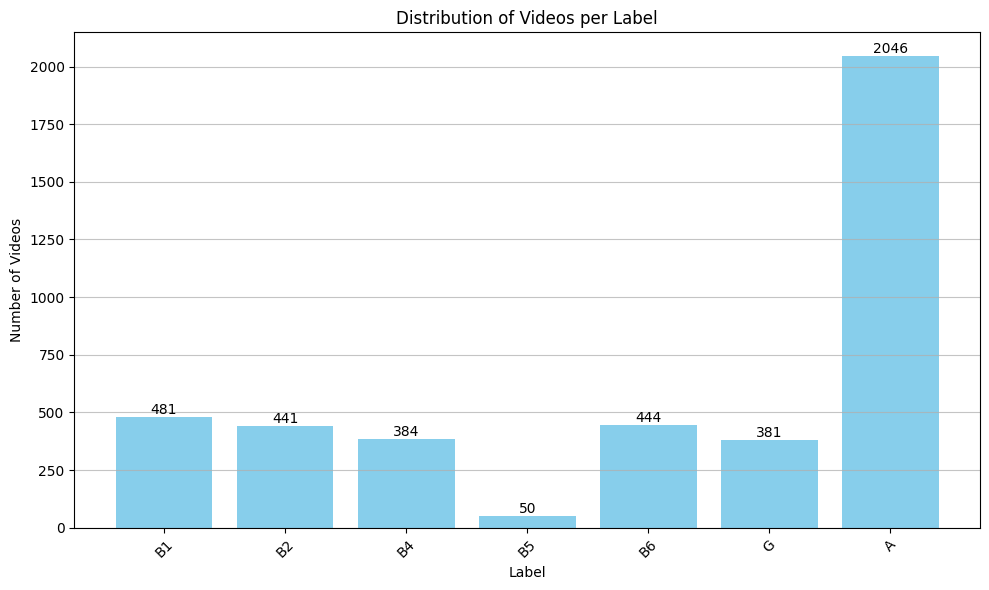

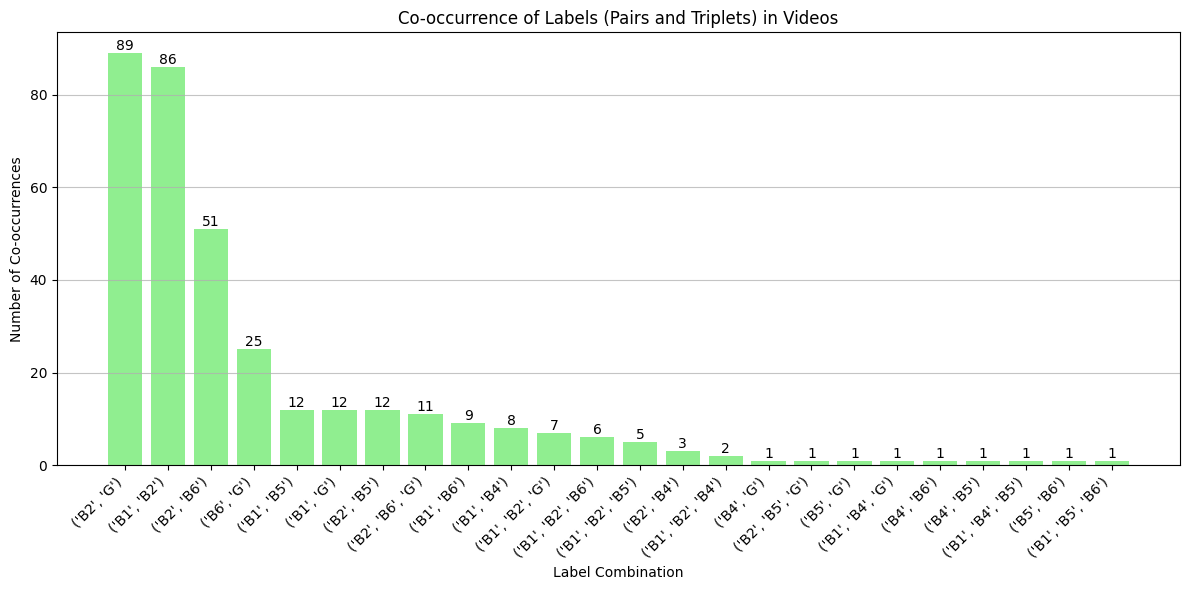

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

VALID_LABELS = ['B1', 'B2', 'B4', 'B5', 'B6', 'G', 'A']  # Define valid labels (including 'A')

def analyze_filenames(directory_path):
    """
    Analyzes filenames in a directory to extract and visualize label distribution,
    considering only the predefined valid labels, extracting after "label_".
    Also stores and prints files with no valid labels.
    """

    label_counts = {label: 0 for label in VALID_LABELS}  # Initialize counts for all valid labels
    video_labels = {}  # Store labels associated with each video
    no_label_files = []  # List to store filenames with NO valid labels
    total_files = 0
    i=0
    bro=open("dataset.txt",'w')

    for root, _, files in os.walk(directory_path):
        for file in files:
            total_files += 1  # Increment total file count

            # Extract labels from filename AFTER "label_"
            match = re.search(r'label_([A-Z0-9-]+)', file)  # Find "label_" followed by characters
            if match:
                label_str = match.group(1)  # Get the string after "label_"
                labels = [label for label in re.findall(r'[A-Z0-9]+', label_str) if label in VALID_LABELS] # find all valid labels
            else:
                labels = []  # No labels found after "label_"

            video_labels[file] = labels
            bro.write(f"{i} {file}:{video_labels[file]}\n")
            i+=1

            if not labels:
                no_label_files.append(os.path.join(root, file))  # Store filename if no valid labels found
            else:
                for label in labels:
                    label_counts[label] += 1

    # Print summary information
    bro.close()
    print(f"Total number of files: {total_files}")
    print(f"Number of files with at least one valid label: {total_files - len(no_label_files)}")
    print(f"Number of files with NO valid labels: {len(no_label_files)}")

    print("\nFiles with NO valid labels:")


    # Create a Pandas DataFrame for better visualization and manipulation
    df_labels = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Video Count'])

    # Plot the distribution of videos with each label
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_labels['Label'], df_labels['Video Count'], color='skyblue')
    plt.xlabel("Label")
    plt.ylabel("Number of Videos")
    plt.title("Distribution of Videos per Label")
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(rotation=45)

    # Add exact numbers on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Display count above bar

    plt.tight_layout()
    plt.show()

    # Analyze co-occurrence of labels (optional, but informative)
    label_cooccurrences = {}
    for video, labels in video_labels.items():  # using all labels for co-occurance
        # Generate pairs
        for label_pair in combinations(labels, 2):
            label_pair = tuple(sorted(label_pair))
            key = label_pair
            label_cooccurrences[key] = label_cooccurrences.get(key, 0) + 1

        # Generate triplets
        for label_triplet in combinations(labels, 3):
            label_triplet = tuple(sorted(label_triplet))
            key = label_triplet
            label_cooccurrences[key] = label_cooccurrences.get(key, 0) + 1

    if label_cooccurrences:
        df_cooccurrences = pd.DataFrame(list(label_cooccurrences.items()), columns=['Label Combination', 'Count'])  # Changed column name
        df_cooccurrences = df_cooccurrences.sort_values(by='Count', ascending=False)  # Sort for better readability

        plt.figure(figsize=(12, 6))
        bars = plt.bar([str(pair) for pair in df_cooccurrences['Label Combination']], df_cooccurrences['Count'],
                       color='lightgreen')  # Changed x-axis label

        plt.xlabel("Label Combination")
        plt.ylabel("Number of Co-occurrences")
        plt.title("Co-occurrence of Labels (Pairs and Triplets) in Videos")  # Change Title
        plt.grid(axis='y', alpha=0.75)
        plt.xticks(rotation=45, ha="right")

        # Add exact numbers on top of the bars in the co-occurrence plot
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
    else:
        print("No co-occurring labels found.")


# Example usage:
directory_path = '/content/drive/MyDrive/Datasets/dataset/'  # Replace with the actual directory path
analyze_filenames(directory_path)

Total number of files: 3950
Number of files with at least one valid label: 3950
Number of files with NO valid labels: 0

Files with NO valid labels:


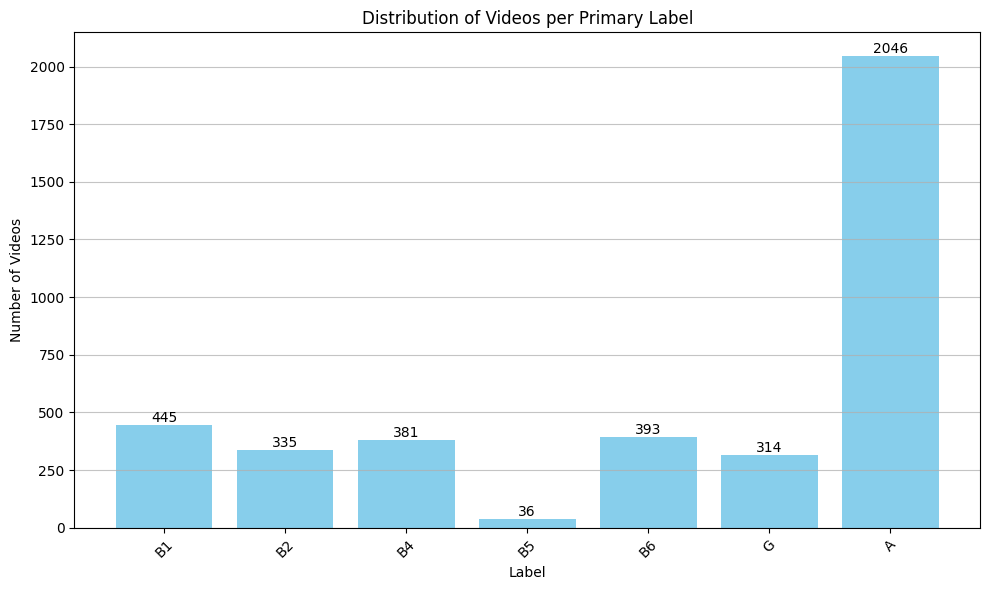

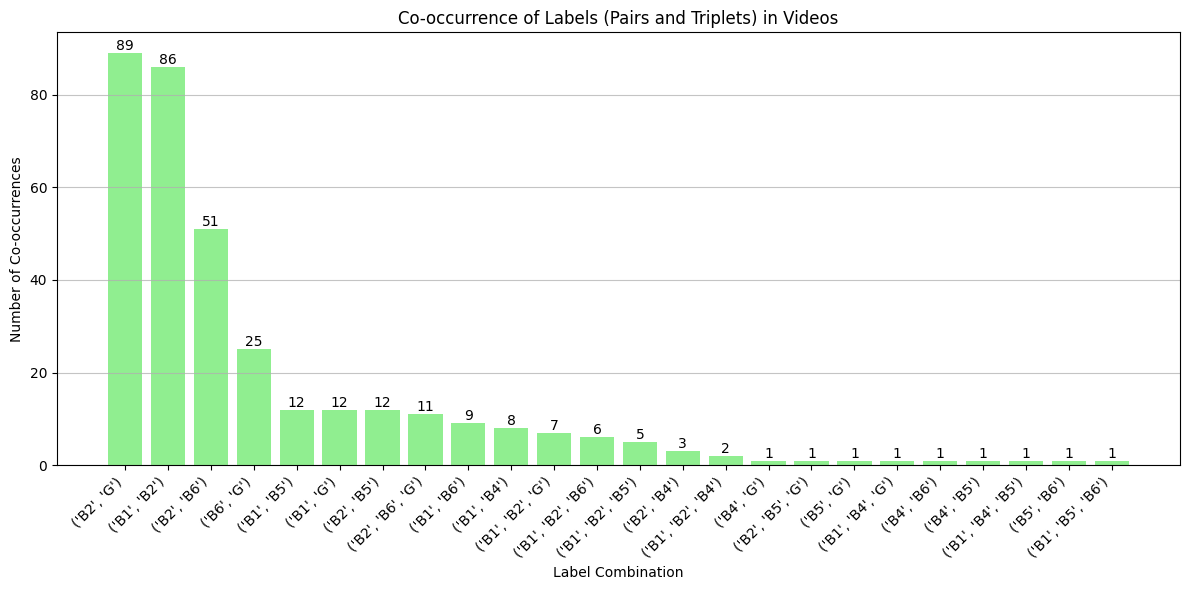

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

VALID_LABELS = ['B1', 'B2', 'B4', 'B5', 'B6', 'G', 'A']  # Define valid labels (including 'A')

def analyze_filenames(directory_path):
    """
    Analyzes filenames in a directory to extract and visualize label distribution,
    considering only the primary label (before hyphen) and co-occurring labels.
    Also stores and prints files with no valid labels.  Co-occurrence now considers
    all possible pairs AND TRIPLETS, regardless of order.

    Args:
        directory_path: The path to the directory containing the video files.
    """

    label_counts = {label: 0 for label in VALID_LABELS}  # Initialize counts for all valid labels
    video_labels = {}  # Store labels associated with each video
    no_label_files = []  # List to store filenames with NO valid labels
    total_files = 0
    i=0
    bro=open("dataset.txt",'w')

    for root, _, files in os.walk(directory_path):
        for file in files:
            total_files += 1  # Increment total file count

            # Extract labels from filename AFTER "label_"
            match = re.search(r'label_([A-Z0-9-]+)', file)  # Find "label_" followed by characters
            labels = [] # Initialize labels here
            primary_label = None  # Initialize primary label
            if match:
                label_str = match.group(1)  # Get the string after "label_"
                all_labels = [label for label in re.findall(r'[A-Z0-9]+', label_str) if label in VALID_LABELS] # find all valid labels

                if all_labels:
                    primary_label = all_labels[0]  # First label is considered the primary label
                    labels = all_labels  # Store all labels for co-occurrence analysis
                    label_counts[primary_label] += 1 # only count it here

            video_labels[file] = labels  # Store all labels for co-occurrence
            bro.write(f"{i} {file}:{video_labels[file]}\n")
            i+=1

            if not labels:
                no_label_files.append(os.path.join(root, file))  # Store filename if no valid labels found

    # Print summary information
    bro.close()
    print(f"Total number of files: {total_files}")
    print(f"Number of files with at least one valid label: {total_files - len(no_label_files)}")
    print(f"Number of files with NO valid labels: {len(no_label_files)}")

    print("\nFiles with NO valid labels:")
    # for file_path in no_label_files:
    #     print(file_path)


    # Create a Pandas DataFrame for better visualization and manipulation
    df_labels = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Video Count'])

    # Plot the distribution of videos with each label
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_labels['Label'], df_labels['Video Count'], color='skyblue')
    plt.xlabel("Label")
    plt.ylabel("Number of Videos")
    plt.title("Distribution of Videos per Primary Label")  # Changed title
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(rotation=45)

    # Add exact numbers on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  # Display count above bar

    plt.tight_layout()
    plt.show()

    # Analyze co-occurrence of labels (optional, but informative)
    label_cooccurrences = {}
    for video, labels in video_labels.items(): # using all labels for co-occurance

        # Generate pairs
        for label_pair in combinations(labels, 2):
            label_pair = tuple(sorted(label_pair))
            key = label_pair
            label_cooccurrences[key] = label_cooccurrences.get(key, 0) + 1

        # Generate triplets
        for label_triplet in combinations(labels, 3):
            label_triplet = tuple(sorted(label_triplet))
            key = label_triplet
            label_cooccurrences[key] = label_cooccurrences.get(key, 0) + 1


    if label_cooccurrences:
        df_cooccurrences = pd.DataFrame(list(label_cooccurrences.items()), columns=['Label Combination', 'Count'])
        df_cooccurrences = df_cooccurrences.sort_values(by='Count', ascending=False) # Sort for better readability

        plt.figure(figsize=(12, 6))
        bars = plt.bar([str(pair) for pair in df_cooccurrences['Label Combination']], df_cooccurrences['Count'], color='lightgreen')
        plt.xlabel("Label Combination")
        plt.ylabel("Number of Co-occurrences")
        plt.title("Co-occurrence of Labels (Pairs and Triplets) in Videos")
        plt.grid(axis='y', alpha=0.75)
        plt.xticks(rotation=45, ha="right")

        # Add exact numbers on top of the bars in the co-occurrence plot
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
    else:
        print("No co-occurring labels found.")


# Example usage:
directory_path = '/content/drive/MyDrive/Datasets/dataset/'  # Replace with the actual directory path
analyze_filenames(directory_path)

In [ ]:
!pip install matplotlib pandas seaborn wordcloud

Total number of files: 3950
Number of files with at least one valid label: 3950
Number of files with NO valid labels: 0

Files with NO valid labels:


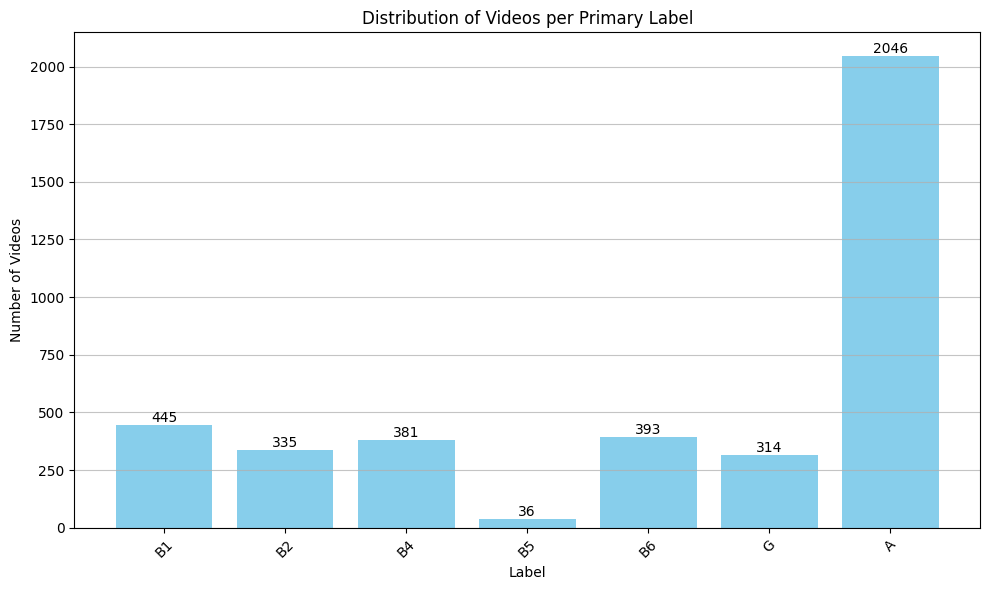

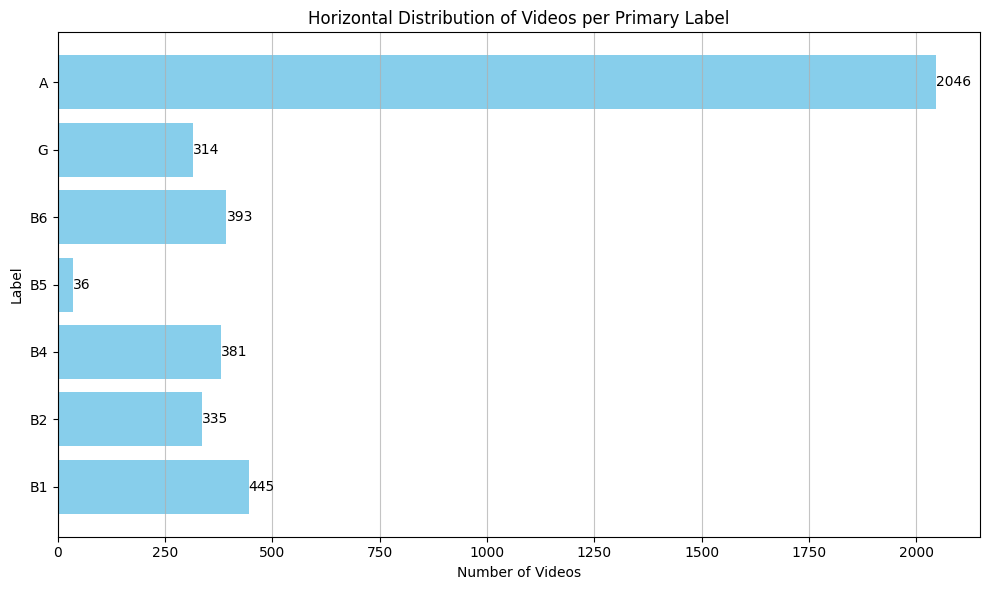

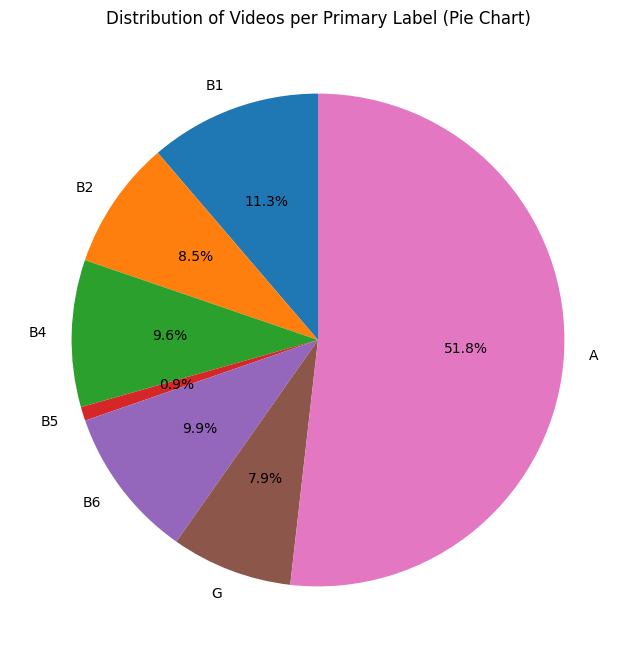

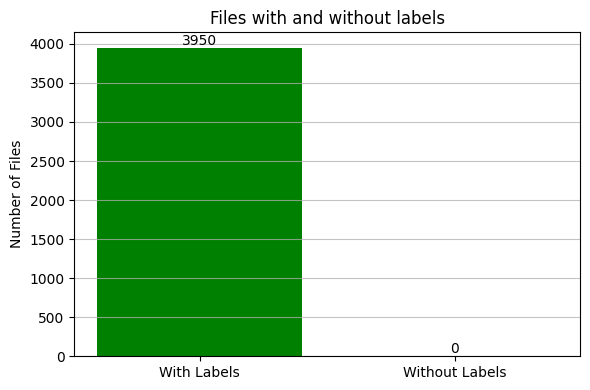

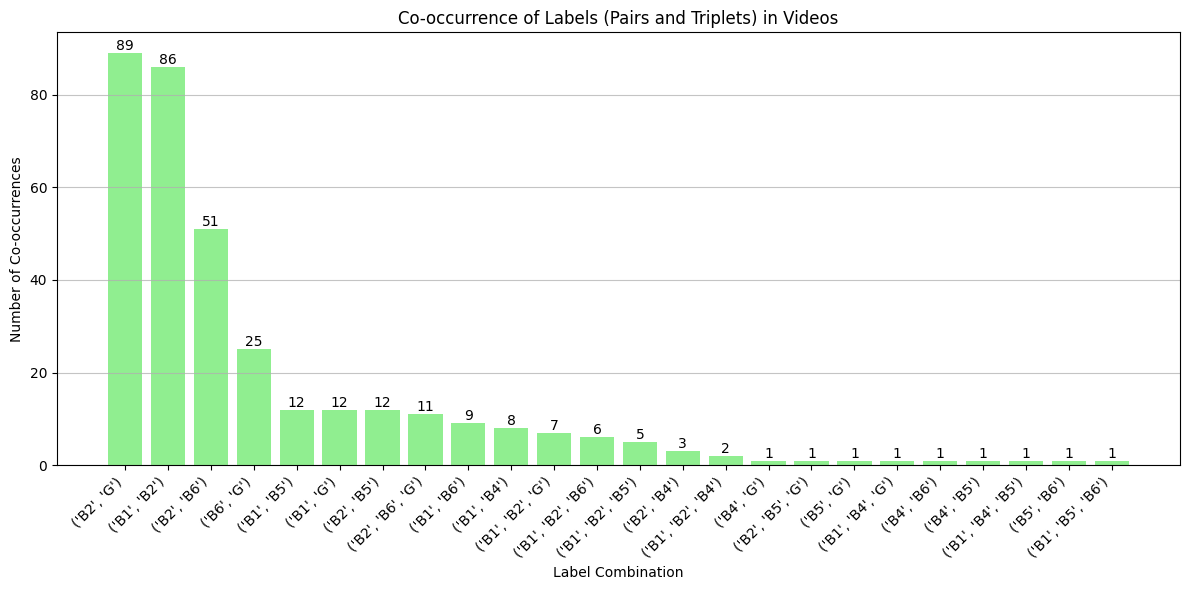

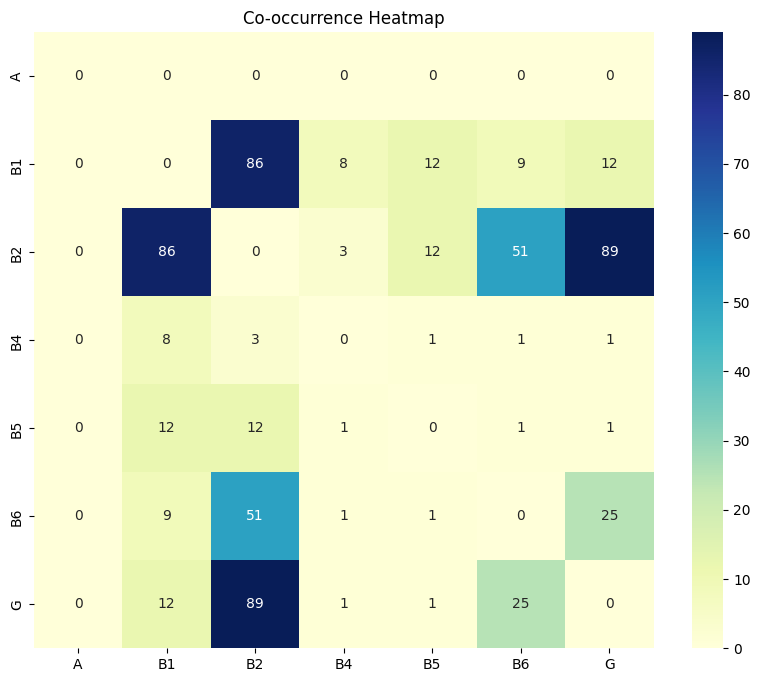

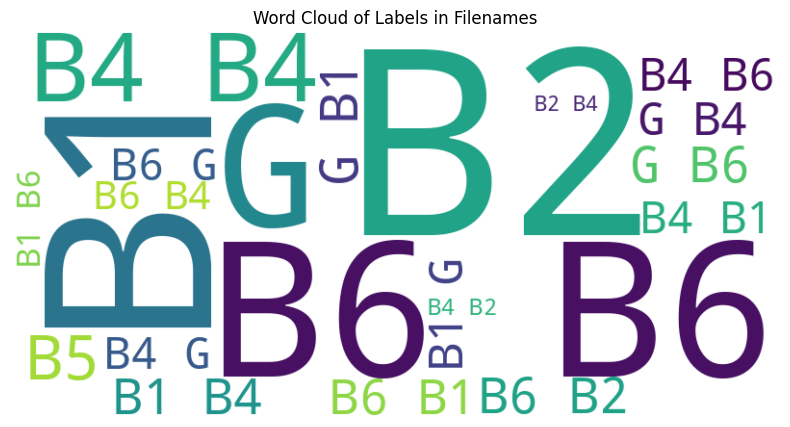

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import seaborn as sns  # for heatmaps
from wordcloud import WordCloud  # for word clouds

VALID_LABELS = ['B1', 'B2', 'B4', 'B5', 'B6', 'G', 'A']  # Define valid labels (including 'A')

def analyze_filenames(directory_path):
    """
    Analyzes filenames in a directory to extract and visualize label distribution,
    considering various graph types.
    """

    label_counts = {label: 0 for label in VALID_LABELS}  # Initialize counts for all valid labels
    video_labels = {}  # Store labels associated with each video
    no_label_files = []  # List to store filenames with NO valid labels
    total_files = 0
    i=0
    bro=open("dataset.txt",'w')

    for root, _, files in os.walk(directory_path):
        for file in files:
            total_files += 1  # Increment total file count

            # Extract labels from filename AFTER "label_"
            match = re.search(r'label_([A-Z0-9-]+)', file)  # Find "label_" followed by characters
            labels = [] # Initialize labels here
            primary_label = None  # Initialize primary label
            if match:
                label_str = match.group(1)  # Get the string after "label_"
                all_labels = [label for label in re.findall(r'[A-Z0-9]+', label_str) if label in VALID_LABELS] # find all valid labels

                if all_labels:
                    primary_label = all_labels[0]  # First label is considered the primary label
                    labels = all_labels  # Store all labels for co-occurrence analysis
                    label_counts[primary_label] += 1 # only count it here

            video_labels[file] = labels  # Store all labels for co-occurrence
            bro.write(f"{i} {file}:{video_labels[file]}\n")
            i+=1

            if not labels:
                no_label_files.append(os.path.join(root, file))  # Store filename if no valid labels found

    # Print summary information
    bro.close()
    print(f"Total number of files: {total_files}")
    print(f"Number of files with at least one valid label: {total_files - len(no_label_files)}")
    print(f"Number of files with NO valid labels: {len(no_label_files)}")

    print("\nFiles with NO valid labels:")


    # Create a Pandas DataFrame for label counts
    df_labels = pd.DataFrame(list(label_counts.items()), columns=['Label', 'Video Count'])

    # 1. Bar Chart of Primary Label Distribution
    plot_bar_chart(df_labels, "Distribution of Videos per Primary Label")

    # 2. Horizontal Bar Chart
    plot_horizontal_bar_chart(df_labels, "Horizontal Distribution of Videos per Primary Label")

    # 3. Pie Chart
    plot_pie_chart(df_labels, "Distribution of Videos per Primary Label (Pie Chart)")

    # 4. Bar Chart of Files with No Labels
    plot_no_label_bar_chart(len(no_label_files), total_files, "Files with and without labels")

    # 5. Co-occurrence Analysis
    label_cooccurrences = {}
    for video, labels in video_labels.items():
        # Generate pairs
        for label_pair in combinations(labels, 2):
            label_pair = tuple(sorted(label_pair))
            key = label_pair
            label_cooccurrences[key] = label_cooccurrences.get(key, 0) + 1

        # Generate triplets
        for label_triplet in combinations(labels, 3):
            label_triplet = tuple(sorted(label_triplet))
            key = label_triplet
            label_cooccurrences[key] = label_cooccurrences.get(key, 0) + 1

    if label_cooccurrences:
        df_cooccurrences = pd.DataFrame(list(label_cooccurrences.items()), columns=['Label Combination', 'Count'])
        df_cooccurrences = df_cooccurrences.sort_values(by='Count', ascending=False)

        # 6. Bar Chart of Co-occurrences
        plot_cooccurrence_bar_chart(df_cooccurrences, "Co-occurrence of Labels (Pairs and Triplets) in Videos")

        # 7. Heatmap of Co-occurrence
        plot_cooccurrence_heatmap(label_cooccurrences, VALID_LABELS)

    else:
        print("No co-occurring labels found.")

    # 8. Word Cloud of Labels
    generate_word_cloud(video_labels, "Word Cloud of Labels in Filenames")


# --- Helper Functions for Plotting ---

def plot_bar_chart(df, title):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df['Label'], df['Video Count'], color='skyblue')
    plt.xlabel("Label")
    plt.ylabel("Number of Videos")
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(rotation=45)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

def plot_horizontal_bar_chart(df, title):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(df['Label'], df['Video Count'], color='skyblue')
    plt.xlabel("Number of Videos")
    plt.ylabel("Label")
    plt.title(title)
    plt.grid(axis='x', alpha=0.75)

    for bar in bars:
        xval = bar.get_width()
        plt.text(xval, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')
    plt.tight_layout()
    plt.show()


def plot_pie_chart(df, title):
    plt.figure(figsize=(8, 8))
    plt.pie(df['Video Count'], labels=df['Label'], autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

def plot_no_label_bar_chart(no_label_count, total_count, title):
    labels = ['With Labels', 'Without Labels']
    counts = [total_count - no_label_count, no_label_count]
    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, counts, color=['green', 'red'])
    plt.ylabel("Number of Files")
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

def plot_cooccurrence_bar_chart(df, title):
    plt.figure(figsize=(12, 6))
    bars = plt.bar([str(pair) for pair in df['Label Combination']], df['Count'], color='lightgreen')
    plt.xlabel("Label Combination")
    plt.ylabel("Number of Co-occurrences")
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(rotation=45, ha="right")

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()


def plot_cooccurrence_heatmap(label_cooccurrences, valid_labels):
    """Plots a heatmap of co-occurrence counts."""
    labels = sorted(valid_labels)
    cooccurrence_matrix = pd.DataFrame(0, index=labels, columns=labels)
    for labels_tuple, count in label_cooccurrences.items(): # Changed here
        if len(labels_tuple) == 2: # Add condition to check for pairs only
            label1, label2 = labels_tuple
            if label1 in labels and label2 in labels: # ensure both labels are valid
                cooccurrence_matrix.loc[label1, label2] = count
                cooccurrence_matrix.loc[label2, label1] = count  # Ensure symmetry

    plt.figure(figsize=(10, 8))
    sns.heatmap(cooccurrence_matrix, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Co-occurrence Heatmap")
    plt.show()


def generate_word_cloud(video_labels, title):
    """Generates and displays a word cloud from the labels."""
    text = ' '.join([label for labels in video_labels.values() for label in labels])  # Flatten labels into one string
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()



# Example usage:
directory_path = '/content/drive/MyDrive/Datasets/dataset/'  # Replace with the actual directory path
analyze_filenames(directory_path)